<a href="https://colab.research.google.com/github/Dheerajkumar76/ML_LabAssignment-2/blob/main/ML_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ A1 - AND Gate Perceptron:
Converged in 13 epochs
Final Weights: [0.2  0.15], Bias: -0.3

✅ A2: Perceptron Training for AND Gate


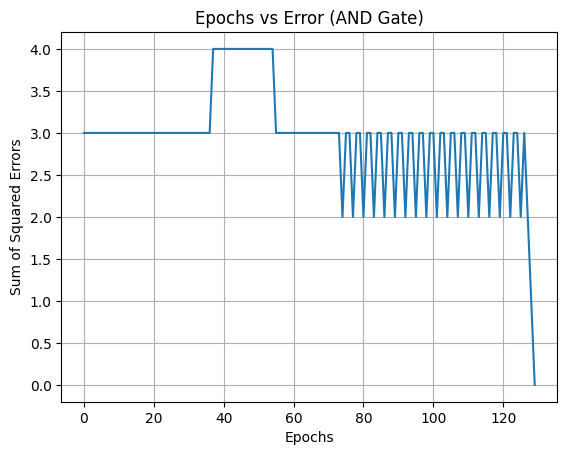

Converged in 130 epochs
Final weights: [0.1  0.05], bias: -0.10000000000000765


✅ A3: Activation Function Training (Step)
Converged in 130 epochs


✅ A4: Learning Rate vs Epochs (Step Activation)


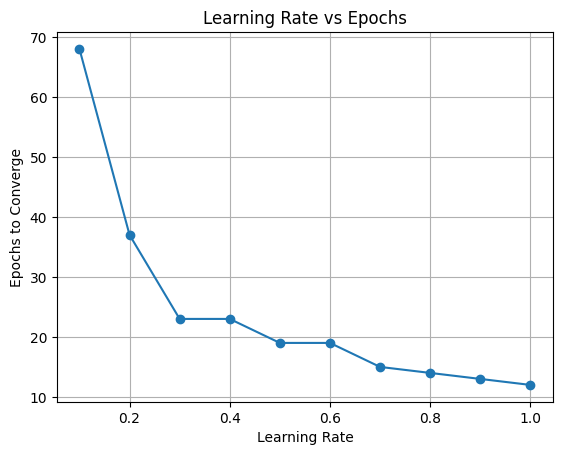


✅ A5: XOR Gate Data Loaded
[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 0]

✅ A6: Train on Customer Data
Trained weights: [-1.76850128  2.65047838 -0.71663039 11.40856558], bias: -5.071867649828053


✅ A7: Pseudo Inverse Solution
Weights (Pseudo-inverse): (array([-0.32112281, -0.3337376 , -0.24943715,  1.66444272]), np.float64(0.11907060677043767))

✅ A8: Backpropagation for AND Gate
Converged in 1000 epochs

✅ A9 - XOR Gate Perceptron:
Ran for 100 epochs
Final Weights: [-0.1 -0.1], Bias: 0.09999999999999998

✅ A10 - XOR Gate with Two Output Nodes:
Converged in 10000 epochs
Final Outputs:
[[0.96 0.04]
 [0.06 0.94]
 [0.5  0.5 ]
 [0.5  0.51]]

✅ A11: MLPClassifier on Customer Data
Predictions: [1 1 1 0 1 0 1 1 0 0]
Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# -------------------- A1: Summation & Activation Functions --------------------

# Activation and summation functions
def summation(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

def step(x):
    return 1 if x >= 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def error_comparator(predicted, actual):
    return actual - predicted

def bipolar_step(x):
    return 1 if x >= 0 else -1

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# A1 - AND Gate
def train_and_gate_perceptron(lr=0.1, epochs=100):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,0,0,1])
    weights = np.array([0.2, -0.75])
    bias = 0.5
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = step(z)
            err = error_comparator(pred, y[i])
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err**2
        if total_error == 0:
            break
    return epoch + 1, weights, bias

# -------------------- A2: Perceptron Training (AND Gate) --------------------
def train_perceptron_AND_gate(lr=0.05, max_epochs=1000, tolerance=0.002):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,0,0,1])
    weights = np.array([0.2, -0.75])
    bias = 10
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = step(z)
            err = error_comparator(pred, y[i])
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err ** 2
        errors.append(total_error)
        if total_error <= tolerance:
            break

    plt.plot(errors)
    plt.xlabel("Epochs")
    plt.ylabel("Sum of Squared Errors")
    plt.title("Epochs vs Error (AND Gate)")
    plt.grid(True)
    plt.show()

    return epoch + 1, weights, bias

# -------------------- A3: Train with Various Activation Functions --------------------
def train_with_activation(X, y, activation_fn, lr=0.05, max_epochs=1000):
    weights = np.array([0.2, -0.75])
    bias = 10
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = activation_fn(z)
            if isinstance(pred, float): pred = round(pred)
            err = error_comparator(pred, y[i])
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err ** 2
        errors.append(total_error)
        if total_error <= 0.002:
            break
    return epoch + 1

# -------------------- A4: Learning Rate vs Epochs --------------------
def test_learning_rates(X, y, activation_fn):
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    epochs_list = []

    for lr in learning_rates:
        epochs = train_with_activation(X, y, activation_fn, lr=lr)
        epochs_list.append(epochs)

    plt.plot(learning_rates, epochs_list, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("Learning Rate vs Epochs")
    plt.grid(True)
    plt.show()

# -------------------- A5: XOR Gate --------------------
def xor_gate_data():
    return np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,1,1,0])

# -------------------- A6: Customer Data --------------------
def customer_data():
    X = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 5, 2, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 1, 4, 148],
        [16, 2, 4, 198]
    ])
    y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    return X, y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def summation(x, weights, bias):
    return np.dot(x, weights) + bias

def train_customer_model(activation_fn=sigmoid, lr=0.05):
    X, y = customer_data()

    # Normalize the data (min-max scaling)
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    weights = np.random.rand(4)  # Fixed dimension
    bias = np.random.rand()

    for epoch in range(1000):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = activation_fn(z)
            err = y[i] - pred
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err**2
        if total_error <= 0.002:
            print(f"Converged at epoch {epoch}")
            break

    return weights, bias


# -------------------- A7: Pseudo Inverse --------------------
def pseudo_inverse_solution():
    X, y = customer_data()

    # Normalize input
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    # Add bias term (column of 1s)
    X_bias = np.c_[np.ones(X.shape[0]), X]

    # Compute pseudo-inverse weights
    pinv = np.linalg.pinv(X_bias)
    weights_full = np.dot(pinv, y)

    bias = weights_full[0]
    weights = weights_full[1:]

    return weights, bias


# -------------------- A8: Backpropagation (AND Gate) --------------------
def sigmoid_derivative(x):
    return x * (1 - x)

def backpropagation_AND():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[0],[0],[1]])
    wh = np.random.uniform(size=(2, 2))
    bh = np.random.uniform(size=(1, 2))
    wo = np.random.uniform(size=(2, 1))
    bo = np.random.uniform(size=(1, 1))
    lr = 0.05

    for epoch in range(1000):
        hinp = np.dot(X, wh) + bh
        hact = sigmoid(hinp)
        outinp = np.dot(hact, wo) + bo
        output = sigmoid(outinp)
        error = y - output
        if np.mean(np.square(error)) < 0.002:
            break
        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(wo.T)
        d_hidden = error_hidden * sigmoid_derivative(hact)
        wo += hact.T.dot(d_output) * lr
        bo += np.sum(d_output, axis=0, keepdims=True) * lr
        wh += X.T.dot(d_hidden) * lr
        bh += np.sum(d_hidden, axis=0, keepdims=True) * lr
    return epoch + 1

# -------------------- A9: Multi-output XOR --------------------
def train_xor_gate_perceptron(lr=0.1, epochs=100):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,1,1,0])
    weights = np.array([0.1, -0.1])
    bias = 0.3
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = step(z)
            err = error_comparator(pred, y[i])
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err**2
    return epoch + 1, weights, bias

# -------------------- A10: Sklearn XOR --------------------
def train_xor_gate_two_output_nodes(lr=0.1, epochs=10000):
    X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
    y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

    wh = np.random.uniform(size=(2, 2))
    bh = np.random.uniform(size=(1, 2))
    wo = np.random.uniform(size=(2, 2))
    bo = np.random.uniform(size=(1, 2))

    for epoch in range(epochs):
        hinp = np.dot(X, wh) + bh
        hact = sigmoid(hinp)
        outinp = np.dot(hact, wo) + bo
        output = sigmoid(outinp)

        error = y - output
        if np.mean(np.square(error)) < 0.01:
            break

        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(wo.T)
        d_hidden = error_hidden * sigmoid_derivative(hact)

        wo += hact.T.dot(d_output) * lr
        bo += np.sum(d_output, axis=0, keepdims=True) * lr
        wh += X.T.dot(d_hidden) * lr
        bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

    return epoch + 1, np.round(output, 2)

# -------------------- A11: Sklearn MLP on Custom Data --------------------
def sklearn_MLP(X, y):
    model = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
    model.fit(X, y)
    preds = model.predict(X)
    acc = accuracy_score(y, preds)
    print("Predictions:", preds)
    print("Accuracy:", acc)

# -------------------- MAIN FUNCTION --------------------
def main():

    print("\n✅ A1 - AND Gate Perceptron:")
    epochs, weights, bias = train_and_gate_perceptron()
    print(f"Converged in {epochs} epochs\nFinal Weights: {weights}, Bias: {bias}")

    print("\n✅ A2: Perceptron Training for AND Gate")
    epochs, w, b = train_perceptron_AND_gate()
    print(f"Converged in {epochs} epochs\nFinal weights: {w}, bias: {b}\n")

    print("\n✅ A3: Activation Function Training (Step)")
    X, y = np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,0,0,1])
    e = train_with_activation(X, y, step)
    print(f"Converged in {e} epochs\n")

    print("\n✅ A4: Learning Rate vs Epochs (Step Activation)")
    test_learning_rates(X, y, step)

    print("\n✅ A5: XOR Gate Data Loaded")
    X_xor, y_xor = xor_gate_data()
    print(X_xor, y_xor)

    print("\n✅ A6: Train on Customer Data")
    weights, bias = train_customer_model()
    print(f"Trained weights: {weights}, bias: {bias}\n")

    print("\n✅ A7: Pseudo Inverse Solution")
    weights = pseudo_inverse_solution()
    print("Weights (Pseudo-inverse):", weights)

    print("\n✅ A8: Backpropagation for AND Gate")
    epochs = backpropagation_AND()
    print(f"Converged in {epochs} epochs")

    print("\n✅ A9 - XOR Gate Perceptron:")
    epochs, weights, bias = train_xor_gate_perceptron()
    print(f"Ran for {epochs} epochs\nFinal Weights: {weights}, Bias: {bias}")

    print("\n✅ A10 - XOR Gate with Two Output Nodes:")
    epochs, output = train_xor_gate_two_output_nodes()
    print(f"Converged in {epochs} epochs\nFinal Outputs:\n{output}")

    print("\n✅ A11: MLPClassifier on Customer Data")
    X, y = customer_data()
    sklearn_MLP(X, y)

# Run the main function
main()
